In [97]:
# Imports :
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
import hdbscan
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import time

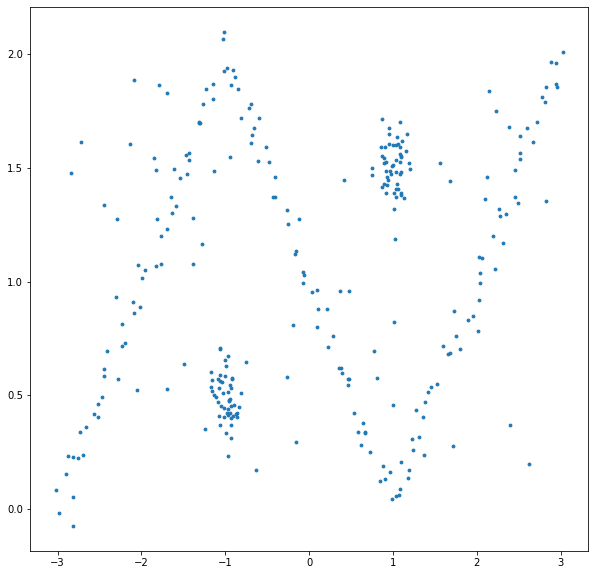

In [196]:
# Synthese :
# I- aléatoire dataset :

  #---> We use here 2D datasets
    # 1 - zgn.data :
with open("./dataset/zgn.data") as f:
    #w, h = [float(x) for x in next(f).split()] # read first line
    array = []
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()])

x=[]
y=[]
P=[]

for i in range(0, len(array)) :
    x.append(array[i][0])
    y.append(array[i][1])
   
tab=array


# show the initial data

plt.figure(figsize=(10,10))
plt.scatter(x, y, s=8)


runtime =  28.58 ms
************Silhouette Coefficient*************
0.6571310072033892
*************************
************Calinski-Harabasz Index¶*************
682.6676642672778
*************************
************** Davies-Bouldin****************
0.5079365625571508
*************************


<Figure size 432x288 with 0 Axes>

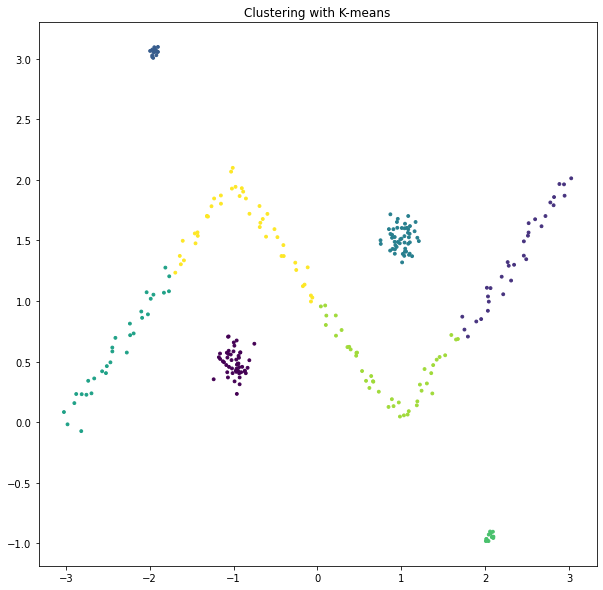

In [253]:
# Trying all methods :

# 1- K-Means :

tps1 = time.time()
y_k = KMeans(n_clusters=8,init='k-means++', n_init=10,max_iter=1000).fit_predict(tab)
tps2 = time.time()

print("runtime = ", round((tps2 - tps1)*1000,2),"ms")

plot2=plt.figure(2)

plt.figure(figsize=(10,10))
plt.scatter(x, y, c=y_k, s=8)

plt.title("Clustering with K-means")


# Metrics :

print("************Silhouette Coefficient*************")
print(metrics.silhouette_score(tab, y_k, metric='euclidean'))
print("*************************")

print("************Calinski-Harabasz Index¶*************")
print(metrics.calinski_harabasz_score(tab, y_k))
print("*************************")

print("************** Davies-Bouldin****************")
print(davies_bouldin_score(tab, y_k))
print("*************************")

runtime =  9.44 ms


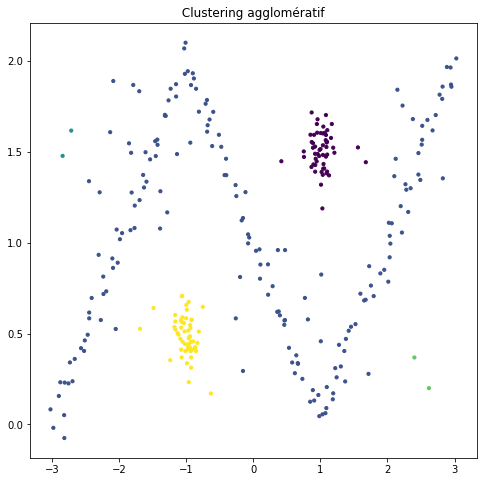

In [198]:
# Clustering agglomératif 


tps1 = time.time()

#n_clusters=3 ==> bad result
#n_clusters=5 ==> good result

clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single').fit(tab) #this two params are more important to get the best result !
tps2 = time.time()
clustering.labels_

plt.figure(figsize=(8,8))
plt.title(" Clustering agglomératif ")
plt.scatter(x,y, c=clustering.labels_, s=10)



print("runtime = ", round((tps2 - tps1)*1000,2),"ms")

In [199]:
# Evaluation of Agglomeratif Clustering with Metrics :

print("****************  Silhouette Coefficient *****************")
print(metrics.silhouette_score(tab, clustering.labels_, metric='euclidean'))
print("*************************")

print("*****************  Calinski-Harabasz Index  ******************")
print(metrics.calinski_harabasz_score(tab,clustering.labels_))
print("*************************")

print("************** Davies-Bouldin****************")
print(davies_bouldin_score(tab, y_k))
print("*************************")

****************  Silhouette Coefficient *****************
0.03885653122607631
*************************
*****************  Calinski-Harabasz Index  ******************
19.794194384277347
*************************
************** Davies-Bouldin****************
0.5945185220052748
*************************


runtime =  1.82 ms


<Figure size 432x288 with 0 Axes>

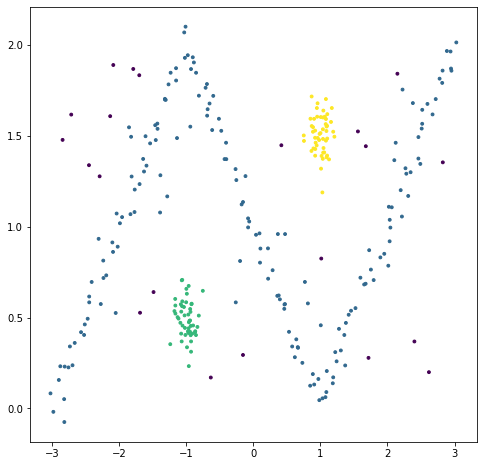

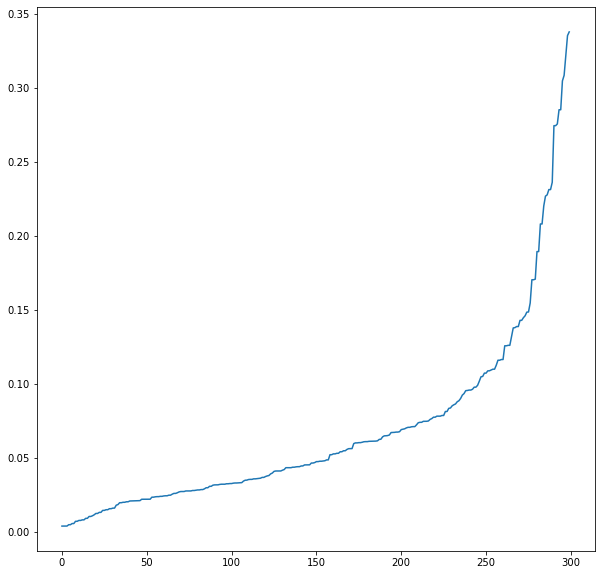

In [200]:
#4 - Clustering DBSCAN :
tps1 = time.time()
db = DBSCAN(eps=0.28, min_samples=4).fit(tab)
tps2 = time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
labels = db.labels_

#print(labels)

plot1=plt.figure(1)
plt.figure(figsize=(8,8))
plt.scatter(x,y, c=labels, s=8)

# Function to calculate the distance for which a point has a certain nbr of neighbours :

neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(tab)
distances, indices = nbrs.kneighbors(tab)

distances = np.sort(distances, axis=0)
#print(distances)
distances = distances[:,1]
#print(distances)

plot2=plt.figure(2)
plt.figure(figsize=(10,10))
plt.plot(distances)

runtime =  5.31 ms


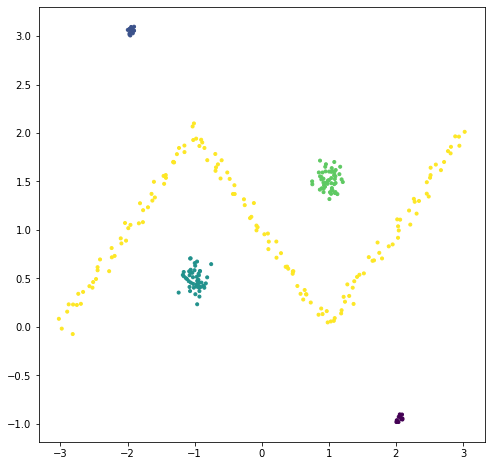

In [204]:
# Clustering HDBSCAN:

clusterer = hdbscan.HDBSCAN()
tps1 = time.time()
cluster_labels = clusterer.fit_predict(tab)
tps2 = time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")

plt.figure(figsize=(8,8))
plt.scatter(x,y, c=cluster_labels, s=9)

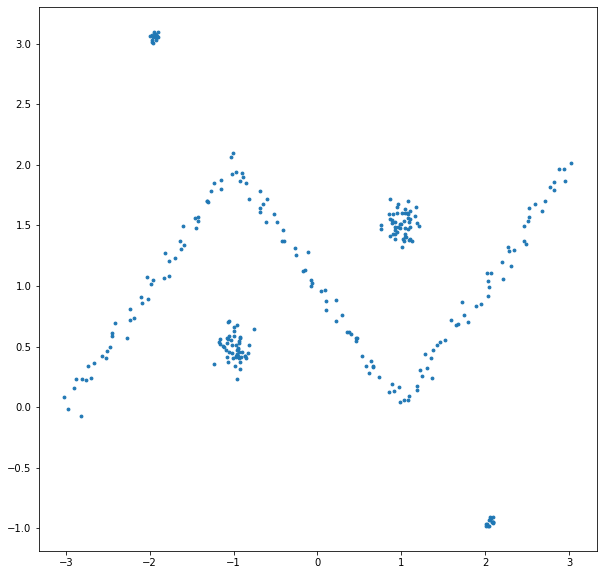

In [242]:
   # 2 - zgo.data :
    
with open("./dataset/zgo.data") as f:
    #w, h = [float(x) for x in next(f).split()] # read first line
    array = []
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()])

x=[]
y=[]
P=[]

for i in range(0, len(array)) :
    x.append(array[i][0])
    y.append(array[i][1])
   
tab=array



#tab = prepareData("./dataset/zgn.data")

# show the initial data

plt.figure(figsize=(10,10))
plt.scatter(x, y, s=8)


runtime =  39.13 ms
************Silhouette Coefficient*************
0.6534452916832374
*************************
************Calinski-Harabasz Index*************
680.1116442095804
*************************
************** Davies-Bouldin****************
0.5084903253896562
*************************


<Figure size 432x288 with 0 Axes>

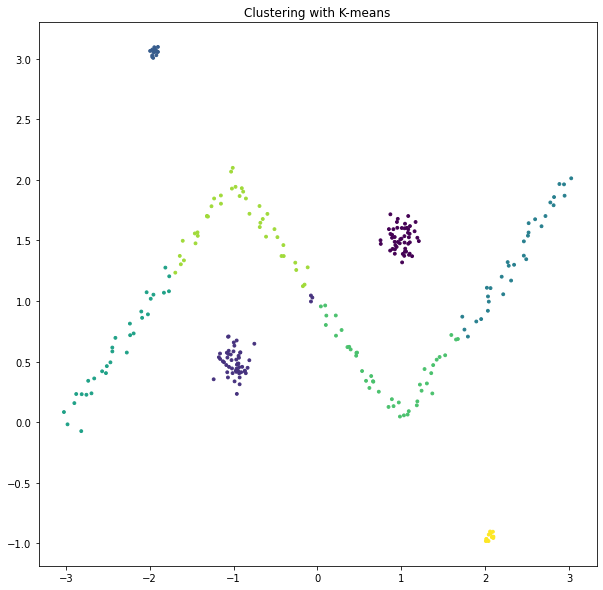

In [258]:
# Trying all methods :

# 1- K-Means :

tps1 = time.time()
y_k = KMeans(n_clusters=8,init='k-means++', n_init=10,max_iter=1000).fit_predict(tab)
tps2 = time.time()

print("runtime = ", round((tps2 - tps1)*1000,2),"ms")

plot2=plt.figure(2)

plt.figure(figsize=(10,10))
plt.scatter(x, y, c=y_k, s=8)

plt.title("Clustering with K-means")


# Metrics :

print("************Silhouette Coefficient*************")
print(metrics.silhouette_score(tab, y_k, metric='euclidean'))
print("*************************")

print("************Calinski-Harabasz Index*************")
print(metrics.calinski_harabasz_score(tab, y_k))
print("*************************")

print("************** Davies-Bouldin****************")
print(davies_bouldin_score(tab, y_k))
print("*************************")

runtime =  4.06 ms


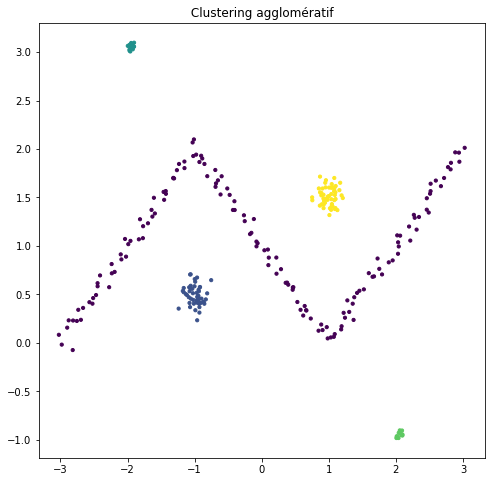

In [244]:
# Clustering agglomératif 


tps1 = time.time()


clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single').fit(tab) #this two params are more important to get the best result !
tps2 = time.time()
clustering.labels_

plt.figure(figsize=(8,8))
plt.title(" Clustering agglomératif ")
plt.scatter(x,y, c=clustering.labels_, s=10)



print("runtime = ", round((tps2 - tps1)*1000,2),"ms")

In [213]:
# Evaluation of Agglomeratif Clustering with Metrics :

print("****************  Silhouette Coefficient *****************")
print(metrics.silhouette_score(tab, clustering.labels_, metric='euclidean'))
print("*************************")

print("*****************  Calinski-Harabasz Index  ******************")
print(metrics.calinski_harabasz_score(tab,clustering.labels_))
print("*************************")

print("************** Davies-Bouldin****************")
print(davies_bouldin_score(tab, y_k))
print("*************************")

****************  Silhouette Coefficient *****************
0.21486984278572413
*************************
*****************  Calinski-Harabasz Index  ******************
49.734619401832134
*************************
************** Davies-Bouldin****************
0.7275672113540649
*************************


runtime =  1.68 ms


<Figure size 432x288 with 0 Axes>

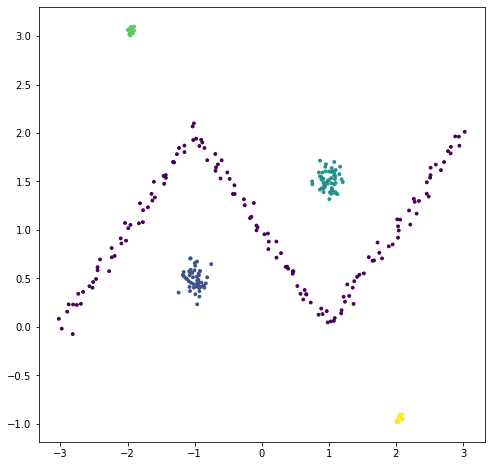

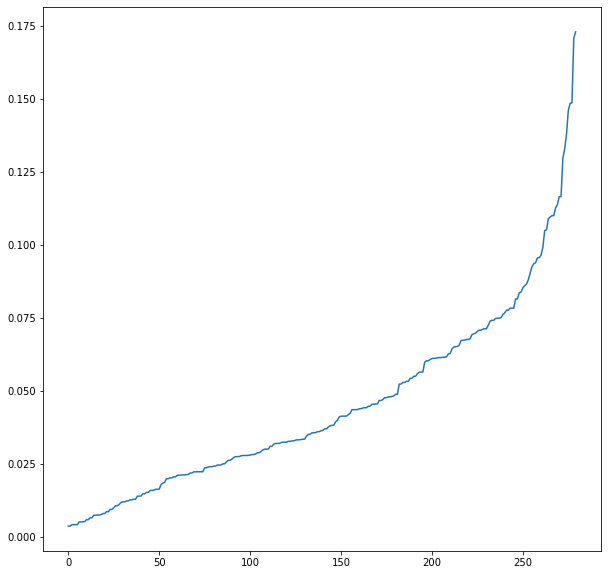

In [216]:
#4 - Clustering DBSCAN :
tps1 = time.time()
db = DBSCAN(eps=0.28, min_samples=4).fit(tab)
tps2 = time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
labels = db.labels_

#print(labels)

plot1=plt.figure(1)
plt.figure(figsize=(8,8))
plt.scatter(x,y, c=labels, s=8)

# Function to calculate the distance for which a point has a certain nbr of neighbours :

neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(tab)
distances, indices = nbrs.kneighbors(tab)

distances = np.sort(distances, axis=0)
#print(distances)
distances = distances[:,1]
#print(distances)

plot2=plt.figure(2)
plt.figure(figsize=(10,10))
plt.plot(distances)

runtime =  6.23 ms


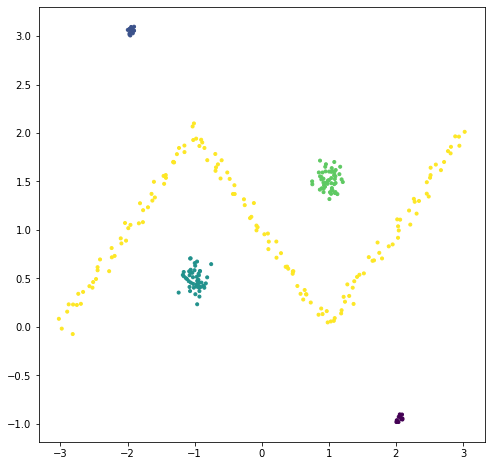

In [219]:
# Clustering HDBSCAN:

clusterer = hdbscan.HDBSCAN()
tps1 = time.time()
cluster_labels = clusterer.fit_predict(tab)
tps2 = time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")

plt.figure(figsize=(8,8))
plt.scatter(x,y, c=cluster_labels, s=9)

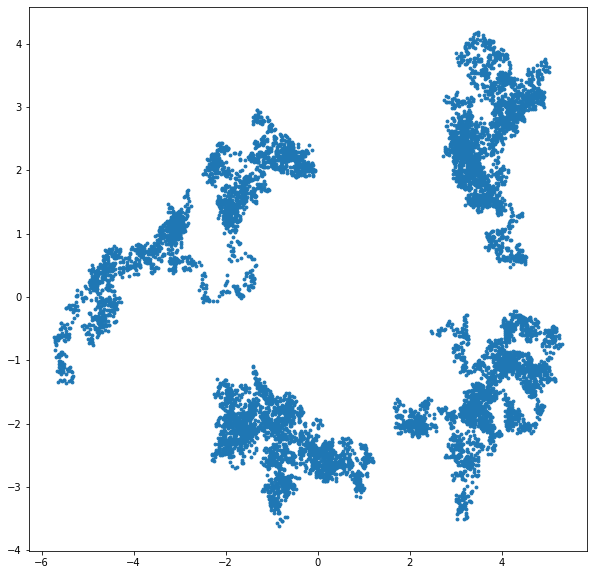

In [220]:
 # 2 - tr.data :
with open("./dataset/tr.data") as f:
    #w, h = [float(x) for x in next(f).split()] # read first line
    array = []
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()])

x=[]
y=[]

for i in range(0, len(array)) :
    x.append(array[i][0])
    y.append(array[i][1])
   
tab=array



#tab = prepareData("./dataset/zgn.data")

# show the initial data

plt.figure(figsize=(10,10))
plt.scatter(x, y, s=8)


runtime =  75.87 ms
************Silhouette Coefficient*************
0.6537600400912208
*************************
************Calinski-Harabasz Index*************
31638.806852805865
*************************
************** Davies-Bouldin****************
0.5005566662823877
*************************


<Figure size 432x288 with 0 Axes>

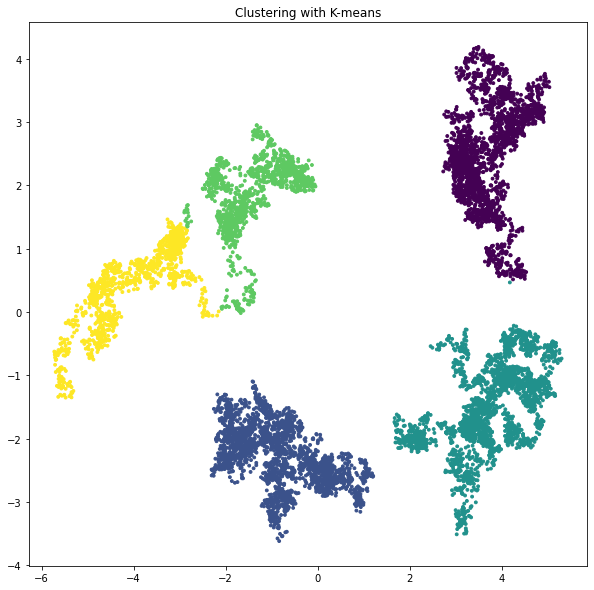

In [223]:
# 1- K-Means :

tps1 = time.time()
y_k = KMeans(n_clusters=5,init='k-means++', n_init=10,max_iter=1000).fit_predict(tab)
tps2 = time.time()

print("runtime = ", round((tps2 - tps1)*1000,2),"ms")

plot2=plt.figure(2)

plt.figure(figsize=(10,10))
plt.scatter(x, y, c=y_k, s=8)

plt.title("Clustering with K-means")


# Metrics :

print("************Silhouette Coefficient*************")
print(metrics.silhouette_score(tab, y_k, metric='euclidean'))
print("*************************")

print("************Calinski-Harabasz Index*************")
print(metrics.calinski_harabasz_score(tab, y_k))
print("*************************")

print("************** Davies-Bouldin****************")
print(davies_bouldin_score(tab, y_k))
print("*************************")

runtime =  295.83 ms


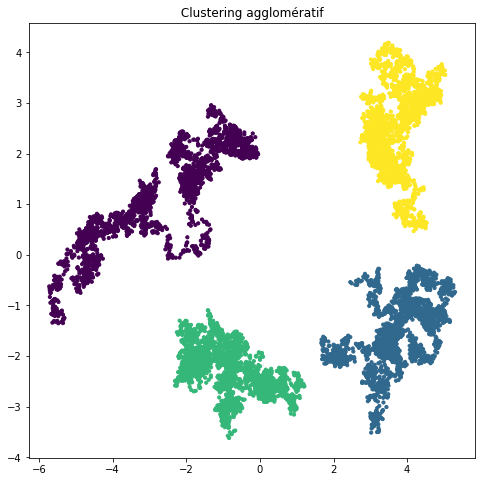

In [227]:
# Clustering agglomératif 


tps1 = time.time()


clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single').fit(tab) #this two params are more important to get the best result !
tps2 = time.time()
clustering.labels_

plt.figure(figsize=(8,8))
plt.title(" Clustering agglomératif ")
plt.scatter(x,y, c=clustering.labels_, s=10)



print("runtime = ", round((tps2 - tps1)*1000,2),"ms")

In [228]:
# Evaluation of Agglomeratif Clustering with Metrics :

print("****************  Silhouette Coefficient *****************")
print(metrics.silhouette_score(tab, clustering.labels_, metric='euclidean'))
print("*************************")

print("*****************  Calinski-Harabasz Index  ******************")
print(metrics.calinski_harabasz_score(tab,clustering.labels_))
print("*************************")

print("************** Davies-Bouldin****************")
print(davies_bouldin_score(tab, y_k))
print("*************************")

****************  Silhouette Coefficient *****************
0.6350054855081031
*************************
*****************  Calinski-Harabasz Index  ******************
25452.08938272893
*************************
************** Davies-Bouldin****************
0.5005566662823877
*************************


runtime =  64.13 ms


<Figure size 432x288 with 0 Axes>

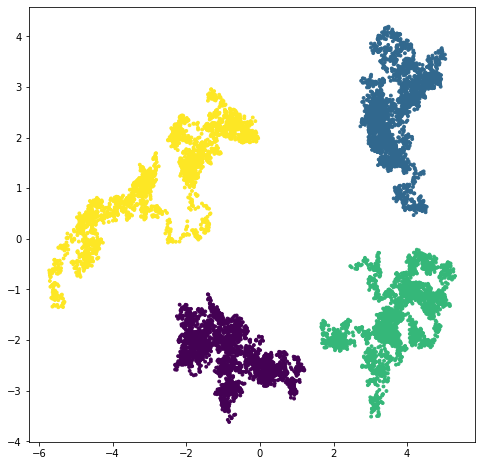

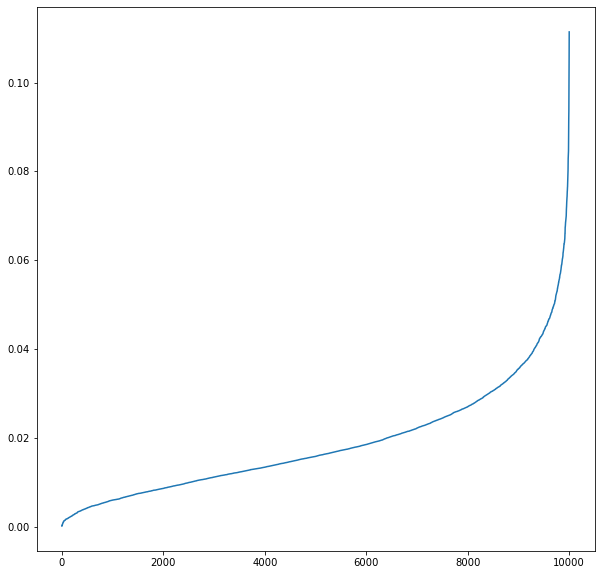

In [231]:
#4 - Clustering DBSCAN :
tps1 = time.time()
db = DBSCAN(eps=0.3, min_samples=4).fit(tab)
tps2 = time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
labels = db.labels_

#print(labels)

plot1=plt.figure(1)
plt.figure(figsize=(8,8))
plt.scatter(x,y, c=labels, s=8)

# Function to calculate the distance for which a point has a certain nbr of neighbours :

neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(tab)
distances, indices = nbrs.kneighbors(tab)

distances = np.sort(distances, axis=0)
#print(distances)
distances = distances[:,1]
#print(distances)

plot2=plt.figure(2)
plt.figure(figsize=(10,10))
plt.plot(distances)

runtime =  137.98 ms


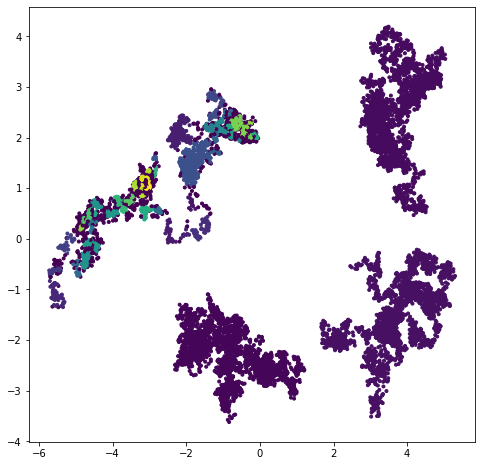

In [234]:
# Clustering HDBSCAN:

clusterer = hdbscan.HDBSCAN()
tps1 = time.time()
cluster_labels = clusterer.fit_predict(tab)
tps2 = time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")

plt.figure(figsize=(8,8))
plt.scatter(x,y, c=cluster_labels, s=9)

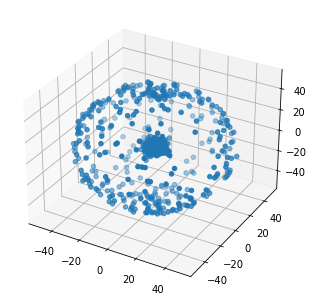

In [285]:
  #---> We use here 3D datasets :
    
from mpl_toolkits.mplot3d import Axes3D
    # 1 - a.data :
with open("./dataset/a.data") as f:
    #w, h = [float(x) for x in next(f).split()] # read first line
    array = []
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()])

x=[]
y=[]
z=[]

for i in range(0, len(array)) :
    x.append(array[i][0])
    y.append(array[i][1])
    z.append(array[i][2])
   
tab=array



# show the initial data

#plt.figure(figsize=(10,10))
#plt.scatter(x, y, s=8)


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x, y, z)
plt.show()

runtime =  27.71 ms


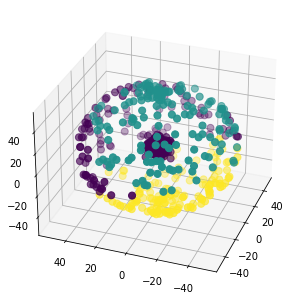

************Silhouette Coefficient*************
0.447656061127839
*************************
************Calinski-Harabasz Index*************
294.1011671149681
*************************
************** Davies-Bouldin****************
1.1962222869323575
*************************


In [286]:
# 1- K-Means:

tps1 = time.time()
y_k = KMeans(n_clusters=3,init='k-means++', n_init=10,max_iter=1000).fit_predict(tab)
tps2 = time.time()

print("runtime = ", round((tps2 - tps1)*1000,2),"ms")



fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=y_k, s=50)
ax.view_init(azim=200)
plt.show()



# Metrics :

print("************Silhouette Coefficient*************")
print(metrics.silhouette_score(tab, y_k, metric='euclidean'))
print("*************************")

print("************Calinski-Harabasz Index*************")
print(metrics.calinski_harabasz_score(tab, y_k))
print("*************************")

print("************** Davies-Bouldin****************")
print(davies_bouldin_score(tab, y_k))
print("*************************")

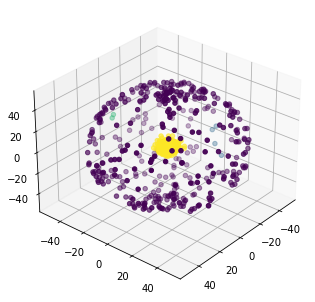

runtime =  4.61 ms
number of cluster found: 4


In [287]:
# 2 -Clustering agglomératif 


tps1 = time.time()


clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single').fit(tab) #this two params are more important to get the best result !
tps2 = time.time()
clustering.labels_



fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=clustering.labels_, s=20)
ax.view_init(azim=400)
plt.show()


print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("number of cluster found: {}".format(len(set(clustering.labels_))))

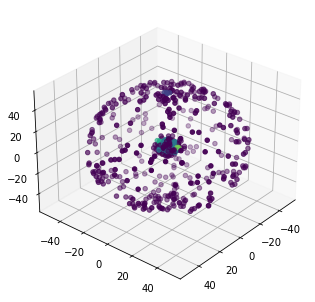

runtime =  6.36 ms
number of cluster found: 6


In [288]:
# 3-DBSCAN:
tps1 = time.time()
model = DBSCAN(eps=1.7, min_samples=4)
model.fit_predict(tab)
pred = model.fit_predict(tab)
tps2 = time.time()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=model.labels_, s=20)
ax.view_init(azim=400)
plt.show()

print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("number of cluster found: {}".format(len(set(model.labels_))))


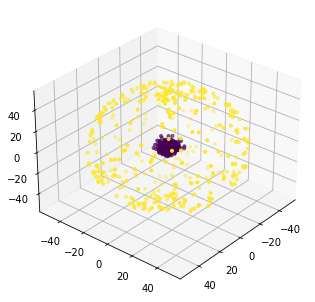

runtime =  36.49 ms
number of cluster found: 2


In [289]:
# Clustering HDBSCAN:

clusterer = hdbscan.HDBSCAN()
tps1 = time.time()
cluster_labels = clusterer.fit_predict(tab)
tps2 = time.time()


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=cluster_labels, s=9)
ax.view_init(azim=400)
plt.show()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("number of cluster found: {}".format(len(set(clusterer.labels_))))


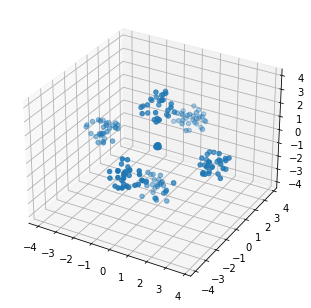

In [323]:
#2- a.data :

with open("./dataset/h.data") as f:
    #w, h = [float(x) for x in next(f).split()] # read first line
    array = []
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()])

x=[]
y=[]
z=[]

for i in range(0, len(array)) :
    x.append(array[i][0])
    y.append(array[i][1])
    z.append(array[i][2])
   
tab=array



# show the initial data

#plt.figure(figsize=(10,10))
#plt.scatter(x, y, s=8)


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x, y, z)
plt.show()

runtime =  18.71 ms


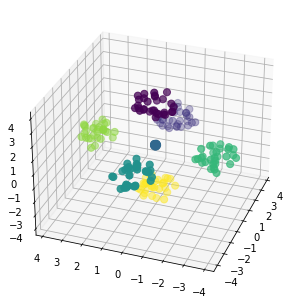

************Silhouette Coefficient*************
0.7019231989948802
*************************
************Calinski-Harabasz Index*************
519.9371972161149
*************************
************** Davies-Bouldin****************
0.3550385854651828
*************************


In [324]:
# 1- K-Means:

tps1 = time.time()
y_k = KMeans(n_clusters=7,init='k-means++', n_init=10,max_iter=1000).fit_predict(tab)
tps2 = time.time()

print("runtime = ", round((tps2 - tps1)*1000,2),"ms")



fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=y_k, s=50)
ax.view_init(azim=200)
plt.show()



# Metrics :

print("************Silhouette Coefficient*************")
print(metrics.silhouette_score(tab, y_k, metric='euclidean'))
print("*************************")

print("************Calinski-Harabasz Index*************")
print(metrics.calinski_harabasz_score(tab, y_k))
print("*************************")

print("************** Davies-Bouldin****************")
print(davies_bouldin_score(tab, y_k))
print("*************************")

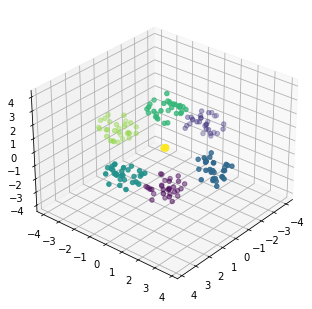

runtime =  2.81 ms
number of cluster found: 7


In [325]:
# 2 -Clustering agglomératif 


tps1 = time.time()


clustering = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='single').fit(tab) #this two params are more important to get the best result !
tps2 = time.time()
clustering.labels_



fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=clustering.labels_, s=20)
ax.view_init(azim=400)
plt.show()


print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("number of cluster found: {}".format(len(set(clustering.labels_))))

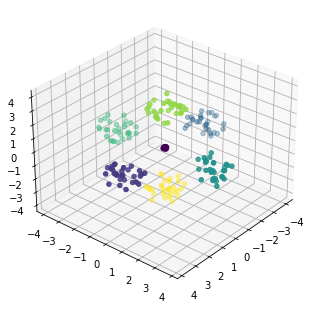

runtime =  3.53 ms
number of cluster found: 7


In [326]:
# 3-DBSCAN:
tps1 = time.time()
model = DBSCAN(eps=1.7, min_samples=4)
model.fit_predict(tab)
pred = model.fit_predict(tab)
tps2 = time.time()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=model.labels_, s=20)
ax.view_init(azim=400)
plt.show()

print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("number of cluster found: {}".format(len(set(model.labels_))))

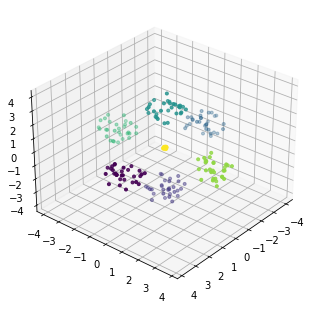

runtime =  4.34 ms
number of cluster found: 7


In [327]:
# Clustering HDBSCAN:

clusterer = hdbscan.HDBSCAN()
tps1 = time.time()
cluster_labels = clusterer.fit_predict(tab)
tps2 = time.time()


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=cluster_labels, s=9)
ax.view_init(azim=400)
plt.show()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("number of cluster found: {}".format(len(set(clusterer.labels_))))

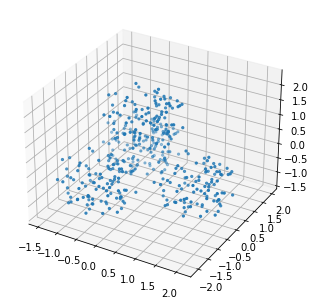

In [328]:
#2- t.data :

with open("./dataset/t.data") as f:
    #w, h = [float(x) for x in next(f).split()] # read first line
    array = []
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()])

x=[]
y=[]
z=[]

for i in range(0, len(array)) :
    x.append(array[i][0])
    y.append(array[i][1])
    z.append(array[i][2])
   
tab=array



# show the initial data

#plt.figure(figsize=(10,10))
#plt.scatter(x, y, s=8)


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x, y, z, s=5)
plt.show()

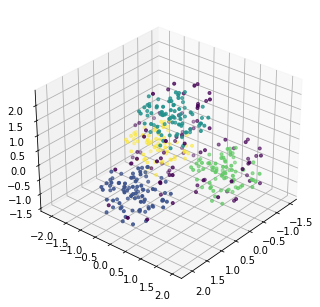

runtime =  6.67 ms
number of cluster found: 5


In [329]:
# Clustering HDBSCAN:

clusterer = hdbscan.HDBSCAN()
tps1 = time.time()
cluster_labels = clusterer.fit_predict(tab)
tps2 = time.time()


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=cluster_labels, s=9)
ax.view_init(azim=400)
plt.show()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("number of cluster found: {}".format(len(set(clusterer.labels_))))

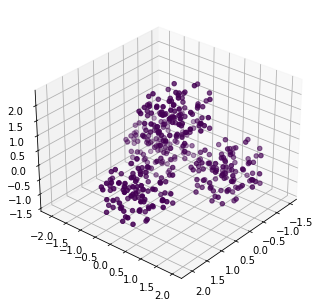

runtime =  3.61 ms
number of cluster found: 1


<Figure size 432x288 with 0 Axes>

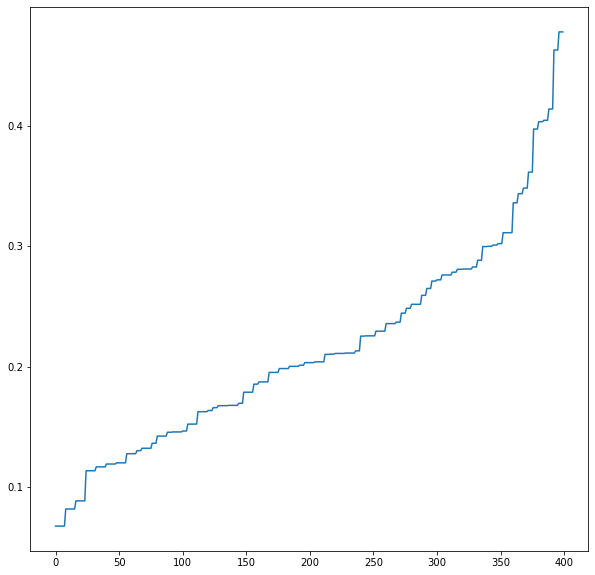

In [330]:
# DBSCAN:
tps1 = time.time()
model = DBSCAN(eps=0.1, min_samples=300)
model.fit_predict(tab)
pred = model.fit_predict(tab)
tps2 = time.time()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=model.labels_, s=20)
ax.view_init(azim=400)
plt.show()

neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(tab)
distances, indices = nbrs.kneighbors(tab)

distances = np.sort(distances, axis=0)
#print(distances)
distances = distances[:,1]
#print(distances)

plot2=plt.figure(2)
plt.figure(figsize=(10,10))
plt.plot(distances)

print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("number of cluster found: {}".format(len(set(model.labels_))))

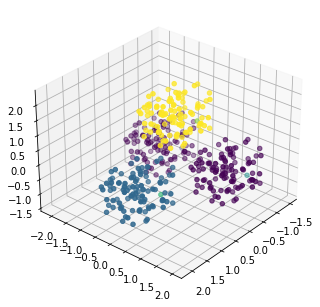

runtime =  3.02 ms
number of cluster found: 7


In [331]:
# Clustering agglomératif 


tps1 = time.time()


clustering = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='single').fit(tab) #this two params are more important to get the best result !
tps2 = time.time()
clustering.labels_



fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=clustering.labels_, s=20)
ax.view_init(azim=400)
plt.show()


print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("number of cluster found: {}".format(len(set(clustering.labels_))))

runtime =  18.99 ms


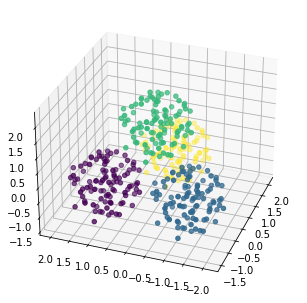

************Silhouette Coefficient*************
0.5057889289788572
*************************
************Calinski-Harabasz Index*************
418.3912090896136
*************************
************** Davies-Bouldin****************
0.662644567562499
*************************


In [334]:
# 1- K-Means:

tps1 = time.time()
y_k = KMeans(n_clusters=4,init='k-means++', n_init=10,max_iter=1000).fit_predict(tab)
tps2 = time.time()

print("runtime = ", round((tps2 - tps1)*1000,2),"ms")



fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=y_k, s=20)
ax.view_init(azim=200)
plt.show()



# Metrics :

print("************Silhouette Coefficient*************")
print(metrics.silhouette_score(tab, y_k, metric='euclidean'))
print("*************************")

print("************Calinski-Harabasz Index*************")
print(metrics.calinski_harabasz_score(tab, y_k))
print("*************************")

print("************** Davies-Bouldin****************")
print(davies_bouldin_score(tab, y_k))
print("*************************")